In [8]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Approximation and phase error

## choose a frequency w for given degree n and tolerance

In [10]:
n = 12
tol = 1e-6
w = rexpi.west(n,tol)

print("for n=%d and tol=%g, our error estimate suggests w=%f"%(n,tol,w))
rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3, info = 1)
print("used %d iterations, error = %.2e, deviation = %.2e"%(info['iterations'],info['err'],info['dev']))
#errcheck = list(zip(*allerr))
#xs = np.linspace(0,1,15123)
#print("(error on test nodes is %.8e)" % np.max(np.abs(rx(1j*xs)-np.exp(1j*w*xs))))


for n=12 and tol=1e-06, our error estimate suggests w=20.601360
used 6 iterations, error = 9.12e-07, deviation = 3.51e-05


## choose a degree n for a given frequency w and tolerance

In [20]:
w = 16
tol = 1e-6
n, infoest = rexpi.nest(w,tol,info=1)
print("for w={} and tol={}, our error estimate suggests n={}".format(w,tol,n))
print("used estimate: %s"%infoest['type'])

rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3, info=1)
print("degree n=%d, used %d iterations, error = %.2e, deviation = %.2e"%(n,info['iterations'],info['err'],info['dev']))

for w=16 and tol=1e-06, our error estimate suggests n=10
used estimate: asym
degree n=10, used 6 iterations, error = 1.85e-06, deviation = 6.02e-06


## plot errors

In [21]:
N=5000 # larger number of points for plots to resolve error at peaks
xs = np.linspace(-1,1,N)
yref = np.exp(1j*w*xs)
aprxerr = rx(1j*xs)-yref
aprxerrxmax = np.max(np.abs(aprxerr))

phaseerr = np.angle(rx(1j*xs)/yref)
phaseerrmax = max(abs(phaseerr))

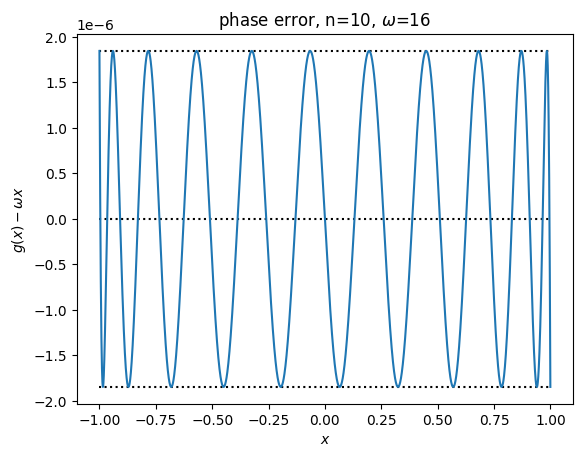

In [22]:
plt.plot([-1,1],[0,0],'k:',[-1,1],[phaseerrmax,phaseerrmax],'k:',[-1,1],[-phaseerrmax,-phaseerrmax],'k:')
plt.plot(xs,phaseerr);
plt.title("phase error, n={}, $\omega$={}".format(n,w))
plt.ylabel("$g(x)-\omega x$")
plt.xlabel("$x$");
#plt.savefig("phaseerror.png")

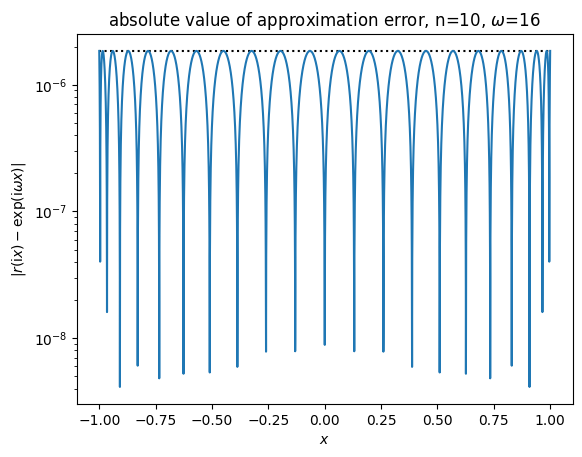

In [23]:
plt.semilogy([-1,1],[aprxerrxmax,aprxerrxmax],'k:')
plt.semilogy(xs,np.abs(aprxerr));
plt.title("absolute value of approximation error, n={}, $\omega$={}".format(n,w))
plt.ylabel("$|r(\mathrm{i}x)-\exp( \mathrm{i} \omega x)|$")
plt.xlabel("$x$");
#plt.ylim((1e-7,4e-6))
#plt.savefig("approxerror.png")

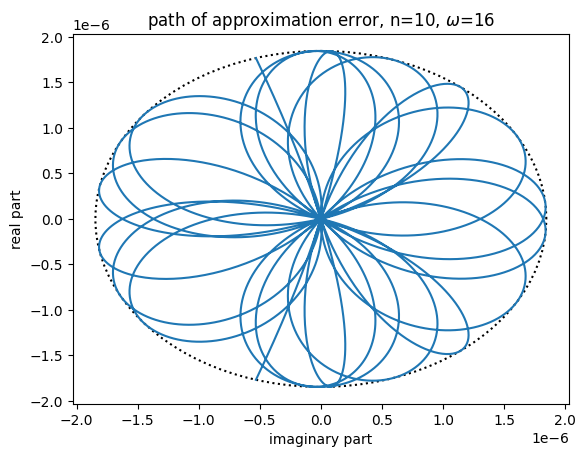

In [24]:
pcirc=np.linspace(0,2*np.pi,100)
plt.plot(aprxerrxmax*np.cos(pcirc),aprxerrxmax*np.sin(pcirc),'k:')
plt.plot(np.real(aprxerr),np.imag(aprxerr));
plt.title("path of approximation error, n={}, $\omega$={}".format(n,w))
plt.xlabel("imaginary part")
plt.ylabel("real part");